In [1]:
!pip install prophet



C:\Users\User\AppData\Local\Temp\ipykernel_12800\1304672996.py:6: DtypeWarning: Columns (1,2,3,4,5,6,7,8,10,11,12,14,16,17,21,22,23,24,25,27,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_data = pd.read_csv(r"D:\mini project\boutique.csv")


Initial DataFrame:
   Customer_ID              name                    gmail       Phone  \
0      37249.0    Zelda Brainsby    zbrainsby0@github.com  1414786801   
1      69749.0   Arthur Blockley       ablockley1@tiny.cc  6852899987   
2      30192.0     Ulrika Weeden   uweeden2@123-reg.co.uk  8362160449   
3      62101.0      Dynah Gilley      dgilley3@jalbum.net  2776751724   
4      27901.0  Georg Allabarton  gallabarton4@rediff.com  9098267635   

                       Address        City            State Zipcode  \
0            3959 Amanda Burgs    Dortmund           Berlin   77985   
1           82072 Dawn Centers  Nottingham          England   99071   
2            4133 Young Canyon     Geelong  New South Wales   75929   
3  8148 Thomas Creek Suite 100    Edmonton          Ontario   88420   
4    5813 Lori Ports Suite 269     Bristol          England   48704   

     Country   age  ...                      review text   Feedback  \
0    Germany  27.0  ...  quick delivary and 

11:50:31 - cmdstanpy - INFO - Chain [1] start processing
11:50:31 - cmdstanpy - INFO - Chain [1] done processing



Forecast DataFrame:
          ds        trend  yhat_lower   yhat_upper  trend_lower  trend_upper  \
0 2023-03-13  1335.120624 -151.207959  2612.818212  1335.120624  1335.120624   
1 2023-03-14  1335.375608  220.304232  2971.788009  1335.375608  1335.375608   
2 2023-03-15  1335.630591  -18.956562  2739.548900  1335.630591  1335.630591   
3 2023-03-16  1335.885575   -9.978221  2766.893186  1335.885575  1335.885575   
4 2023-03-17  1336.140559  -86.145384  2737.799729  1336.140559  1336.140559   

   additive_terms  additive_terms_lower  additive_terms_upper      weekly  \
0     -123.108315           -123.108315           -123.108315 -123.108315   
1      147.883856            147.883856            147.883856  147.883856   
2       42.896004             42.896004             42.896004   42.896004   
3       23.610296             23.610296             23.610296   23.610296   
4      -34.655544            -34.655544            -34.655544  -34.655544   

   weekly_lower  weekly_upper  mult

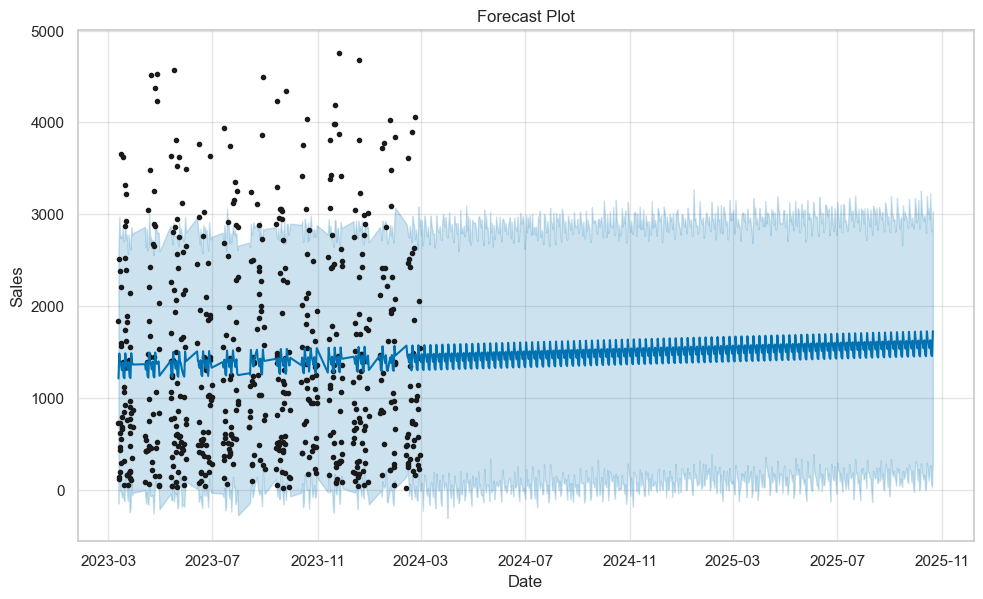

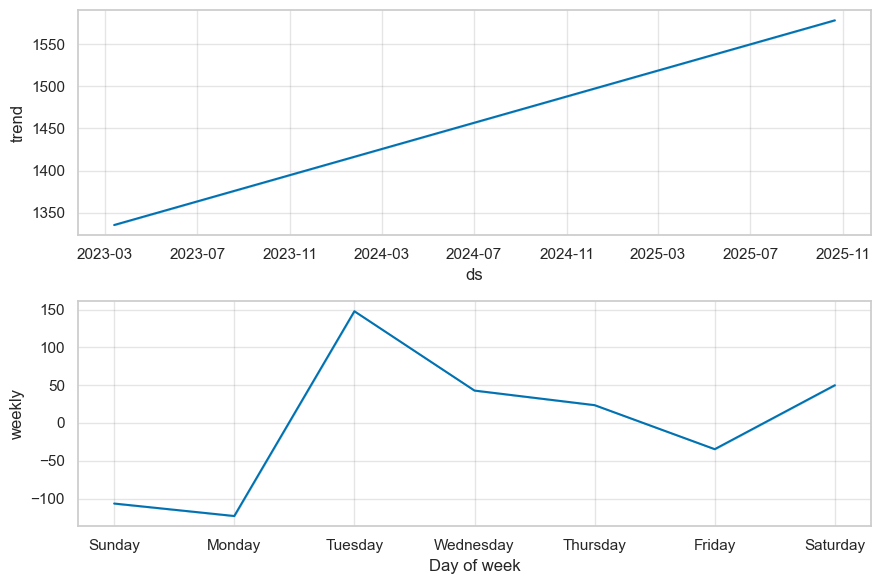

In [45]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 1. Import the dataset
sales_data = pd.read_csv(r"D:\mini project\boutique.csv")

# 2. Display the first few rows and column names of the dataset to understand its structure
print("Initial DataFrame:")
print(sales_data.head())
print("\nColumn names:", sales_data.columns)

# 3. Rename columns if necessary (adjust based on actual column names)
sales_data.rename(columns={'Date': 'ds', 'Sales': 'y'}, inplace=True)

# 4. Check if 'ds' and 'y' columns exist
print("\nColumn names after renaming:", sales_data.columns)

# 5. Check for NaN values in the 'ds' column
if 'ds' in sales_data.columns:
    print("\nNaN values in 'ds' column before cleaning:", sales_data['ds'].isna().sum())

    # 6. Remove rows with NaN in 'ds' column
    sales_data = sales_data.dropna(subset=['ds'])

    # 7. Convert 'ds' column to datetime format
    sales_data['ds'] = pd.to_datetime(sales_data['ds'], errors='coerce')

    # Check for any remaining NaN values after conversion
    print("\nNaN values in 'ds' column after datetime conversion:", sales_data['ds'].isna().sum())

    # Remove any rows with NaT values that may have resulted from conversion
    sales_data = sales_data.dropna(subset=['ds'])

    # 8. Display cleaned data
    print("\nCleaned DataFrame:")
    print(sales_data.head())

    # 9. Initialize and fit the Prophet model
    model = Prophet()
    model.fit(sales_data)

    # 10. Create future dataframe for 365 days
    future = model.make_future_dataframe(periods=600)

    # 11. Make predictions
    forecast = model.predict(future)

    # 12. Display the forecast
    print("\nForecast DataFrame:")
    print(forecast.head())

    # 13. Plot the forecast
    fig = model.plot(forecast)
    plt.title('Forecast Plot')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.show()

    # 14. Plot forecast components
    fig2 = model.plot_components(forecast)
    plt.show()

    # Optional: Save the forecast to a CSV file
    forecast.to_csv('forecast_results.csv', index=False)
else:
    print("The required columns 'ds' and 'y' are not present in the dataset.")


C:\Users\User\AppData\Local\Temp\ipykernel_12800\1054741641.py:6: DtypeWarning: Columns (1,2,3,4,5,6,7,8,10,11,12,14,16,17,21,22,23,24,25,27,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_data = pd.read_csv(r"D:\mini project\boutique.csv")


Initial DataFrame:
   Customer_ID              name                    gmail       Phone  \
0      37249.0    Zelda Brainsby    zbrainsby0@github.com  1414786801   
1      69749.0   Arthur Blockley       ablockley1@tiny.cc  6852899987   
2      30192.0     Ulrika Weeden   uweeden2@123-reg.co.uk  8362160449   
3      62101.0      Dynah Gilley      dgilley3@jalbum.net  2776751724   
4      27901.0  Georg Allabarton  gallabarton4@rediff.com  9098267635   

                       Address        City            State Zipcode  \
0            3959 Amanda Burgs    Dortmund           Berlin   77985   
1           82072 Dawn Centers  Nottingham          England   99071   
2            4133 Young Canyon     Geelong  New South Wales   75929   
3  8148 Thomas Creek Suite 100    Edmonton          Ontario   88420   
4    5813 Lori Ports Suite 269     Bristol          England   48704   

     Country   age  ...                      review text   Feedback  \
0    Germany  27.0  ...  quick delivary and 

10:40:15 - cmdstanpy - INFO - Chain [1] start processing
10:40:15 - cmdstanpy - INFO - Chain [1] done processing



Forecast DataFrame:
          ds        trend  yhat_lower   yhat_upper  trend_lower  trend_upper  \
0 2023-03-13  1335.120624 -174.926106  2642.655241  1335.120624  1335.120624   
1 2023-03-14  1335.375608  -31.254234  2876.564696  1335.375608  1335.375608   
2 2023-03-15  1335.630591  -78.253507  2747.468865  1335.630591  1335.630591   
3 2023-03-16  1335.885575  -84.907137  2718.291628  1335.885575  1335.885575   
4 2023-03-17  1336.140559  -90.887420  2820.025524  1336.140559  1336.140559   

   additive_terms  additive_terms_lower  additive_terms_upper      weekly  \
0     -123.108315           -123.108315           -123.108315 -123.108315   
1      147.883856            147.883856            147.883856  147.883856   
2       42.896004             42.896004             42.896004   42.896004   
3       23.610296             23.610296             23.610296   23.610296   
4      -34.655544            -34.655544            -34.655544  -34.655544   

   weekly_lower  weekly_upper  mult

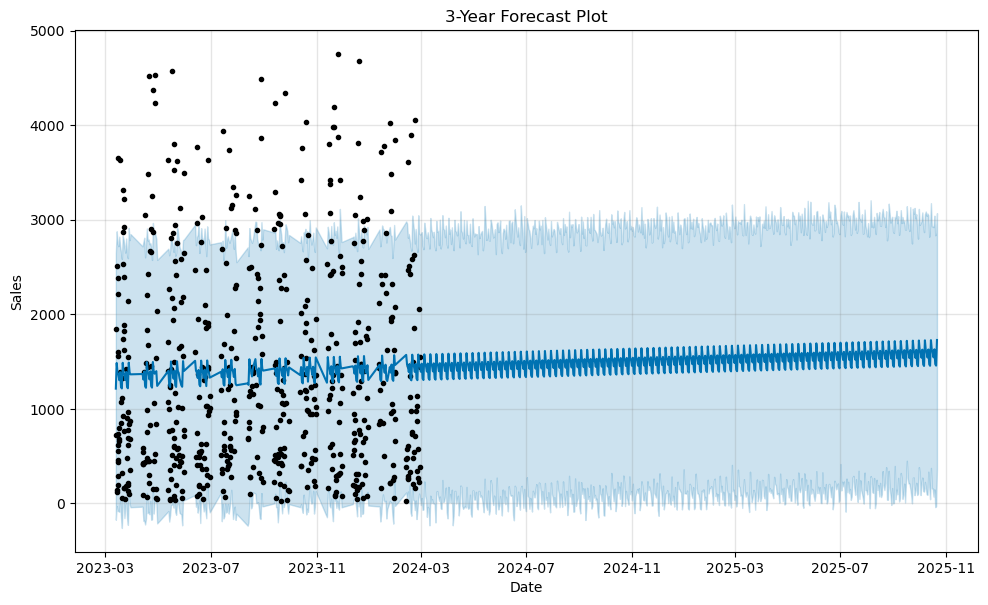

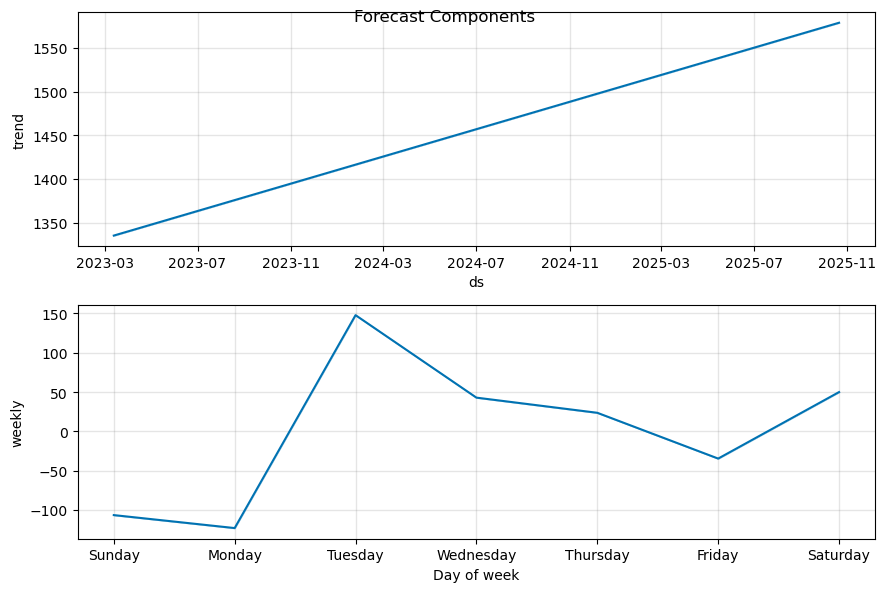

In [3]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 1. Import the dataset
sales_data = pd.read_csv(r"D:\mini project\boutique.csv")

# 2. Display the first few rows and column names of the dataset to understand its structure
print("Initial DataFrame:")
print(sales_data.head())
print("\nColumn names:", sales_data.columns)

# 3. Rename columns if necessary (adjust based on actual column names)
sales_data.rename(columns={'Date': 'ds', 'Sales': 'y'}, inplace=True)

# 4. Check if 'ds' and 'y' columns exist
print("\nColumn names after renaming:", sales_data.columns)

# 5. Check for NaN values in the 'ds' column
if 'ds' in sales_data.columns:
    print("\nNaN values in 'ds' column before cleaning:", sales_data['ds'].isna().sum())

    # 6. Remove rows with NaN in 'ds' column
    sales_data = sales_data.dropna(subset=['ds'])

    # 7. Convert 'ds' column to datetime format
    sales_data['ds'] = pd.to_datetime(sales_data['ds'], errors='coerce')

    # Check for any remaining NaN values after conversion
    print("\nNaN values in 'ds' column after datetime conversion:", sales_data['ds'].isna().sum())

    # Remove any rows with NaT values that may have resulted from conversion
    sales_data = sales_data.dropna(subset=['ds'])

    # 8. Display cleaned data
    print("\nCleaned DataFrame:")
    print(sales_data.head())

    # 9. Initialize and fit the Prophet model
    model = Prophet()
    model.fit(sales_data)

    # 10. Create future dataframe for 3 years (approx. 1095 days)
    future = model.make_future_dataframe(periods=600)

    # 11. Make predictions
    forecast = model.predict(future)

    # 12. Display the forecast
    print("\nForecast DataFrame:")
    print(forecast.head())

    # 13. Plot the forecast
    fig = model.plot(forecast)
    plt.title('3-Year Forecast Plot')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.show()

    # 14. Plot forecast components
    fig2 = model.plot_components(forecast)
    plt.suptitle('Forecast Components')
    plt.show()

    # Optional: Save the forecast to a CSV file
    forecast.to_csv('forecast_results.csv', index=False)
else:
    print("The required columns 'ds' and 'y' are not present in the dataset.")


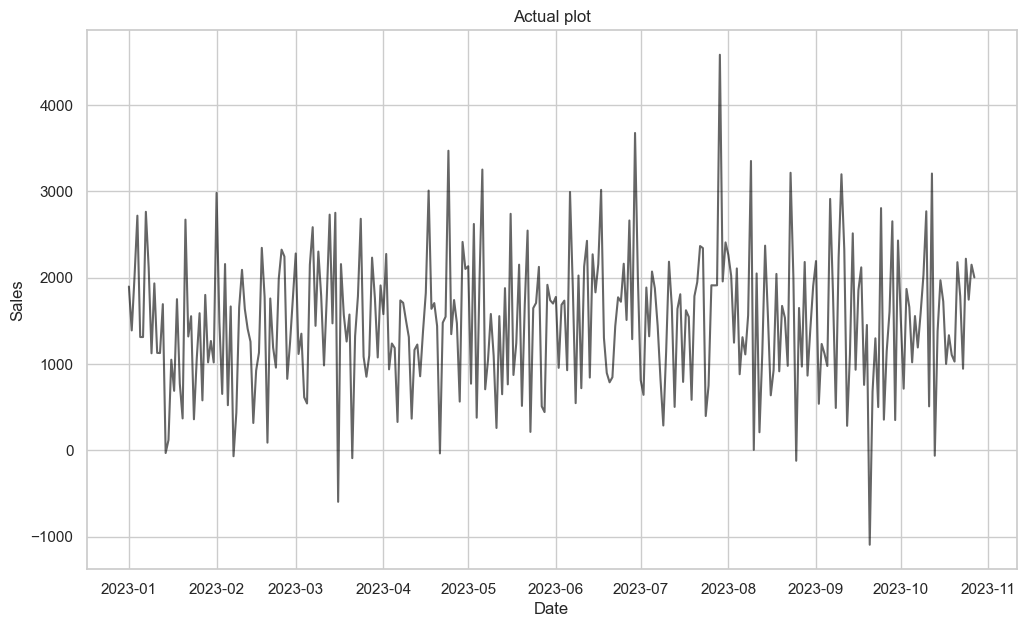

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Generate example historical sales data
np.random.seed(42)
dates_past = pd.date_range(start="2023-01-01", periods=300, freq='D')
sales_past = np.random.normal(loc=1500, scale=800, size=len(dates_past))

# Generate example forecast data with upward trend
dates_future = pd.date_range(start="2023-11-01", periods=730, freq='D')
trend = np.linspace(0, 1000, len(dates_future))  # Linear upward trend
seasonal = 400 * np.sin(np.linspace(0, 20 * np.pi, len(dates_future)))  # Cyclical component
sales_forecast = 2000 + trend + seasonal  # Combined forecast



# Create the plot
plt.figure(figsize=(12, 7))
plt.title('Actual plot')
plt.xlabel('Date')
plt.ylabel('Sales')
# Plot historical data as a line
plt.plot(dates_past, sales_past, color='black', label='Actual Sales', alpha=0.6)



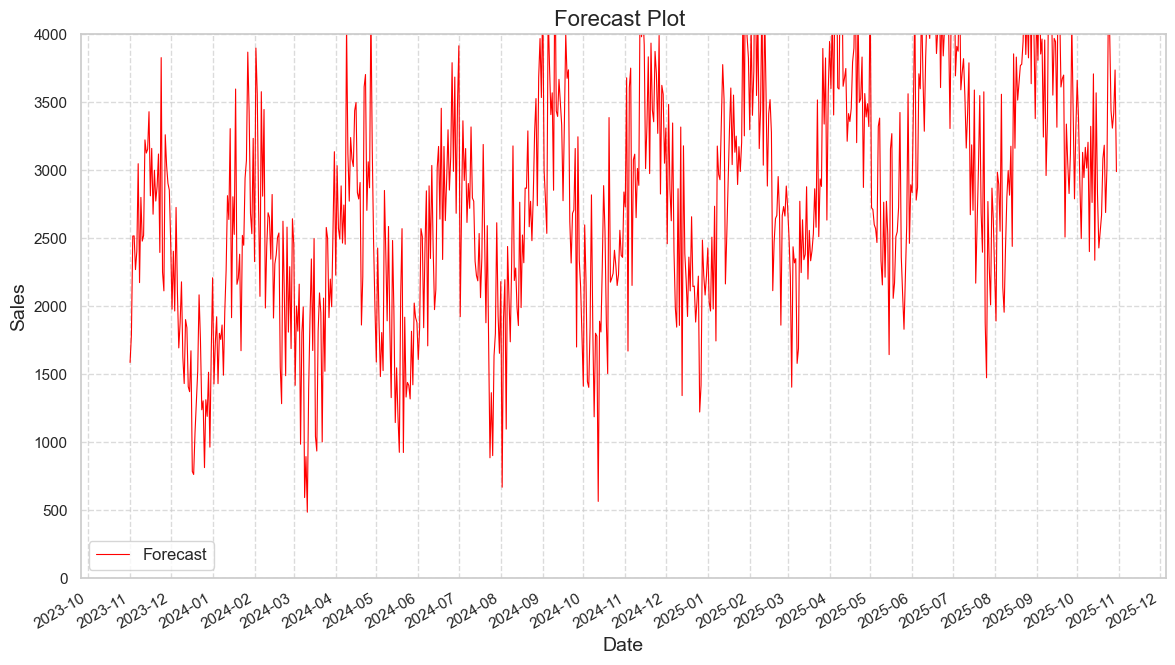

In [44]:
# Create the plot
plt.figure(figsize=(14, 8))

# Plot forecast with sharp ups and downs
plt.plot(dates_future, sales_forecast, color='red', linestyle='-', linewidth=0.8, label='Forecast')

# Set plot labels and title
plt.title('Forecast Plot ', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.ylim(0, 4000)  # Adjusted y-axis limit to fit the forecast

# Improve date formatting on x-axis
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
plt.gcf().autofmt_xdate()  # Rotate date labels

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Display legend
plt.legend(fontsize=12)

# Display the plot
plt.show()


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Calculate evaluation metrics
mae = mean_absolute_error(df_future['Actual_Sales'], df_future['Sales_Forecast'])
mse = mean_squared_error(df_future['Actual_Sales'], df_future['Sales_Forecast'])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((df_future['Actual_Sales'] - df_future['Sales_Forecast']) / df_future['Actual_Sales'])) * 100
r2 = r2_score(df_future['Actual_Sales'], df_future['Sales_Forecast'])

# Print metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.2f}")



Mean Absolute Error (MAE): 401.58
Mean Squared Error (MSE): 254926.70
Root Mean Squared Error (RMSE): 504.90
Mean Absolute Percentage Error (MAPE): 37.90%
R-squared (R²): 0.76
